In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 

import warnings
warnings.filterwarnings("ignore")

import calendar


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


pd.options.display.float_format = "{:,.2f}".format 

# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations


from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder#, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

sys.path.append(os.path.abspath("../../src"))   
import soporte_preprocesamiento as f
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder     #solo me deja hacerlo si uso el entorno default en vez del proyecto
pd.set_option("display.max_columns", None)


In [2]:
df_sinull=pd.read_csv("../../datos/datos4/datos_sin_nulos.csv", index_col=0).reset_index(drop=True)


In [3]:
df_sinull["rooms"]=df_sinull["rooms"].astype("O")
df_sinull["bathrooms"]=df_sinull["bathrooms"].astype("O")
df_sinull["exterior"]=df_sinull["exterior"].astype("O")

In [4]:
df_sinull.head(2)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,hasLift
0,750.00,flat,60.00,True,1,1,Madrid,7037,good,3,Hortaleza,True
1,750.00,flat,70.00,True,2,1,San Sebastián de los Reyes,16145,good,bj,Centro Urbano,False


In [5]:
df_sinull.duplicated().sum()

np.int64(1)

In [6]:
df_sinull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         348 non-null    float64
 1   propertyType  348 non-null    object 
 2   size          348 non-null    float64
 3   exterior      348 non-null    object 
 4   rooms         348 non-null    object 
 5   bathrooms     348 non-null    object 
 6   municipality  348 non-null    object 
 7   distance      348 non-null    int64  
 8   status        348 non-null    object 
 9   floor         348 non-null    object 
 10  district      348 non-null    object 
 11  hasLift       348 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.8+ KB


In [7]:
df_sinull_copy=df_sinull.copy()

Se ha comprobado usando value_counts que las columnas con las que contamos tiene sentido mantenerlas pues no domina una categoría frente a la otra de manera exagerada (Es decir que no nos vaya a aportar información relevante)

In [8]:
df_categoricas= df_sinull_copy.select_dtypes("O")

Tenemos 9 columnas de categóricas

In [10]:
df_categoricas.nunique()

propertyType     6
exterior         2
rooms            5
bathrooms        3
municipality    61
status           4
floor           14
district        83
hasLift          3
dtype: int64

In [11]:
df_categoricas.head()

,propertyType,exterior,rooms,bathrooms,municipality,status,floor,district,hasLift
0,flat,True,1,1,Madrid,good,3,Hortaleza,True
1,flat,True,2,1,San Sebastián de los Reyes,good,bj,Centro Urbano,False
2,penthouse,True,2,2,Villamanrique de Tajo,good,2,desconocido,False
3,flat,True,3,2,Rascafría,good,desconocido,desconocido,False
4,studio,True,0,1,Madrid,desconocido,desconocido,desconocido,desconocido


Vamos a recordar la distribución de la categóricas

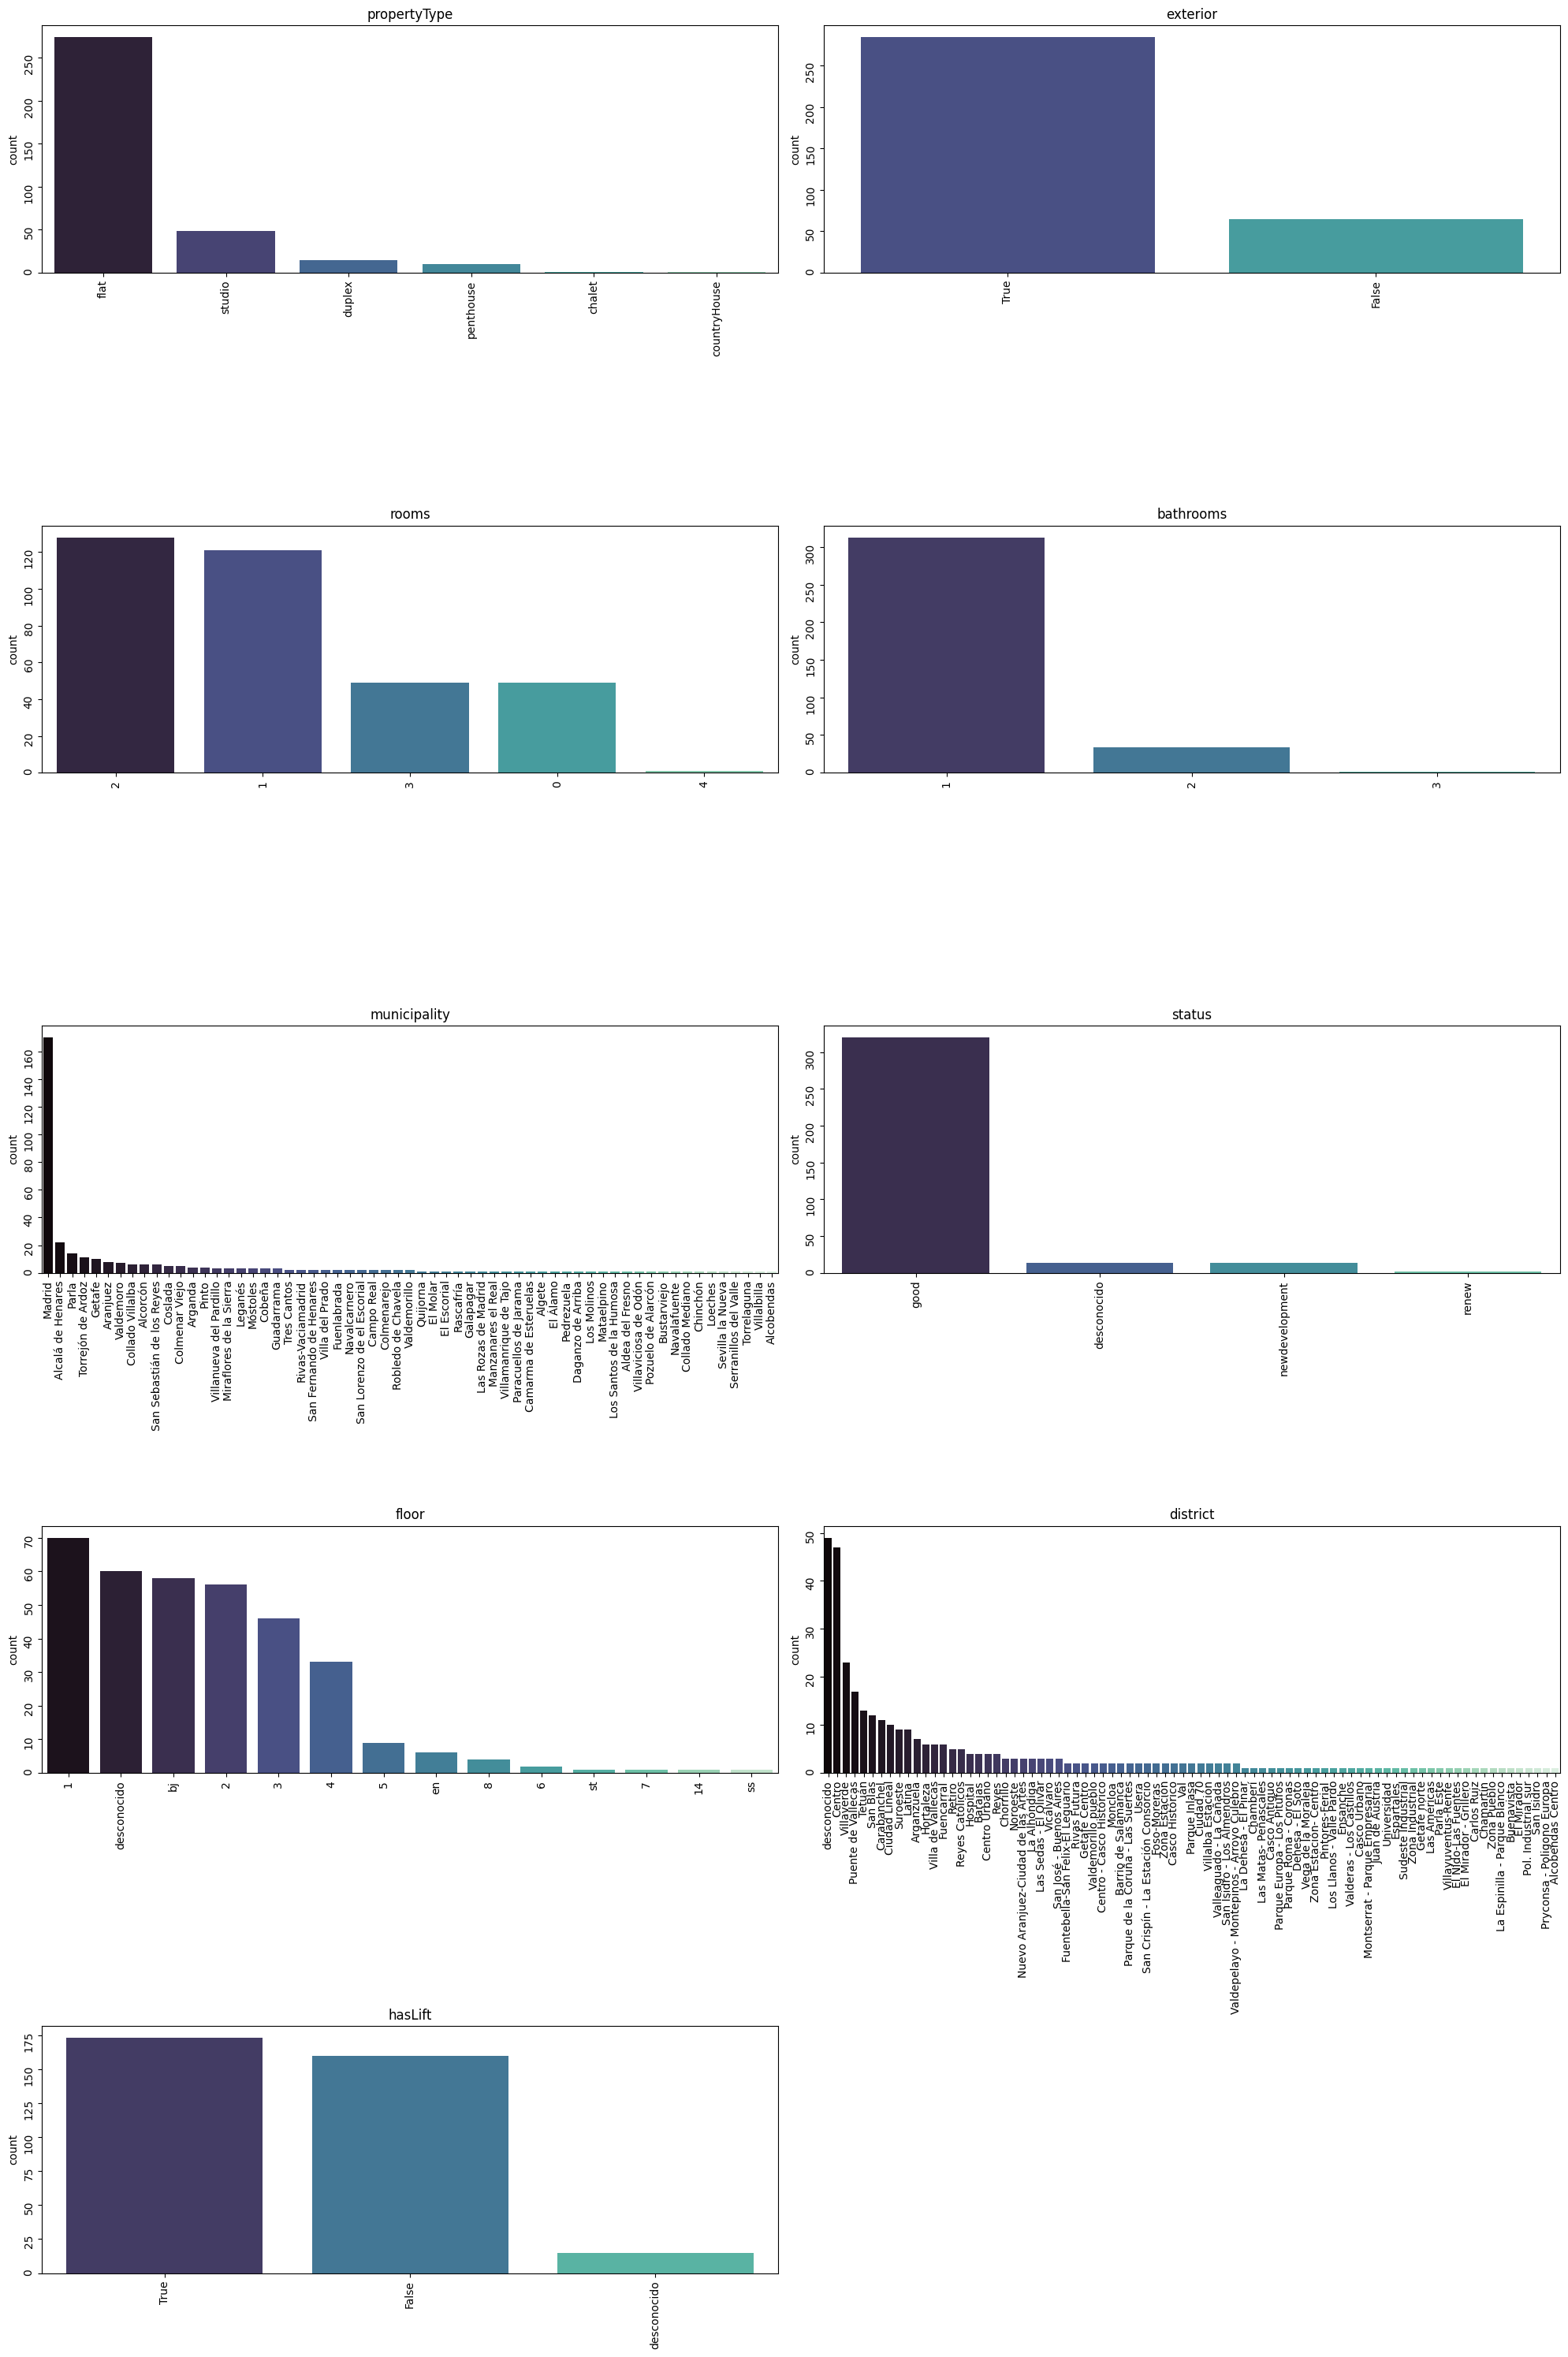

In [12]:
f.plot_categoricas(df_categoricas, (20,30))

Ahora vamos a visualizar la relación entre la dependiente y las categóricas 

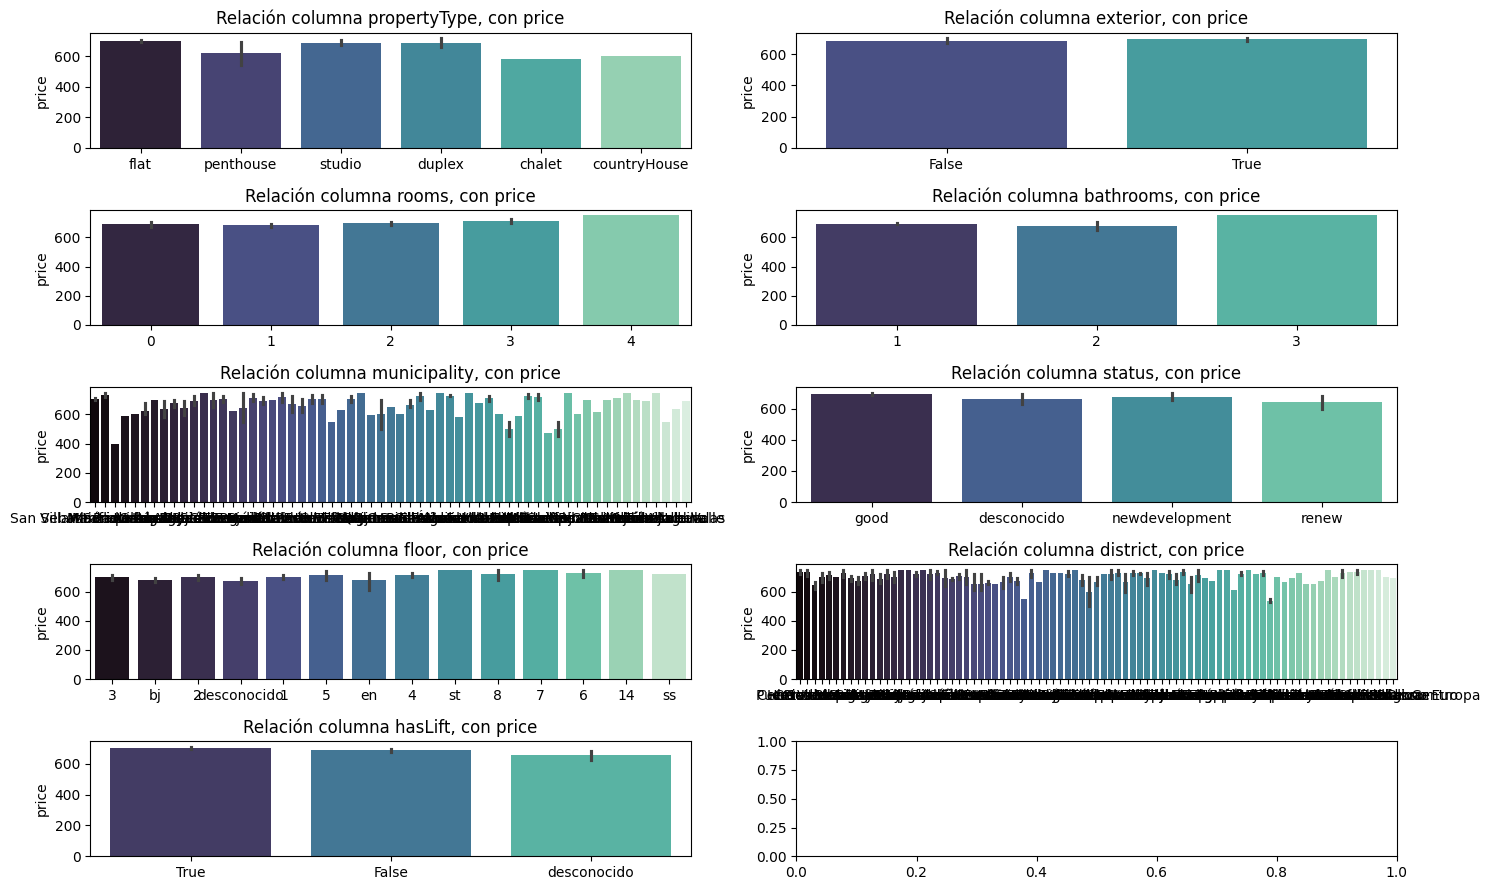

In [13]:
f.visualizar_categoricas(df_sinull_copy, "price", (15,9), "bar")

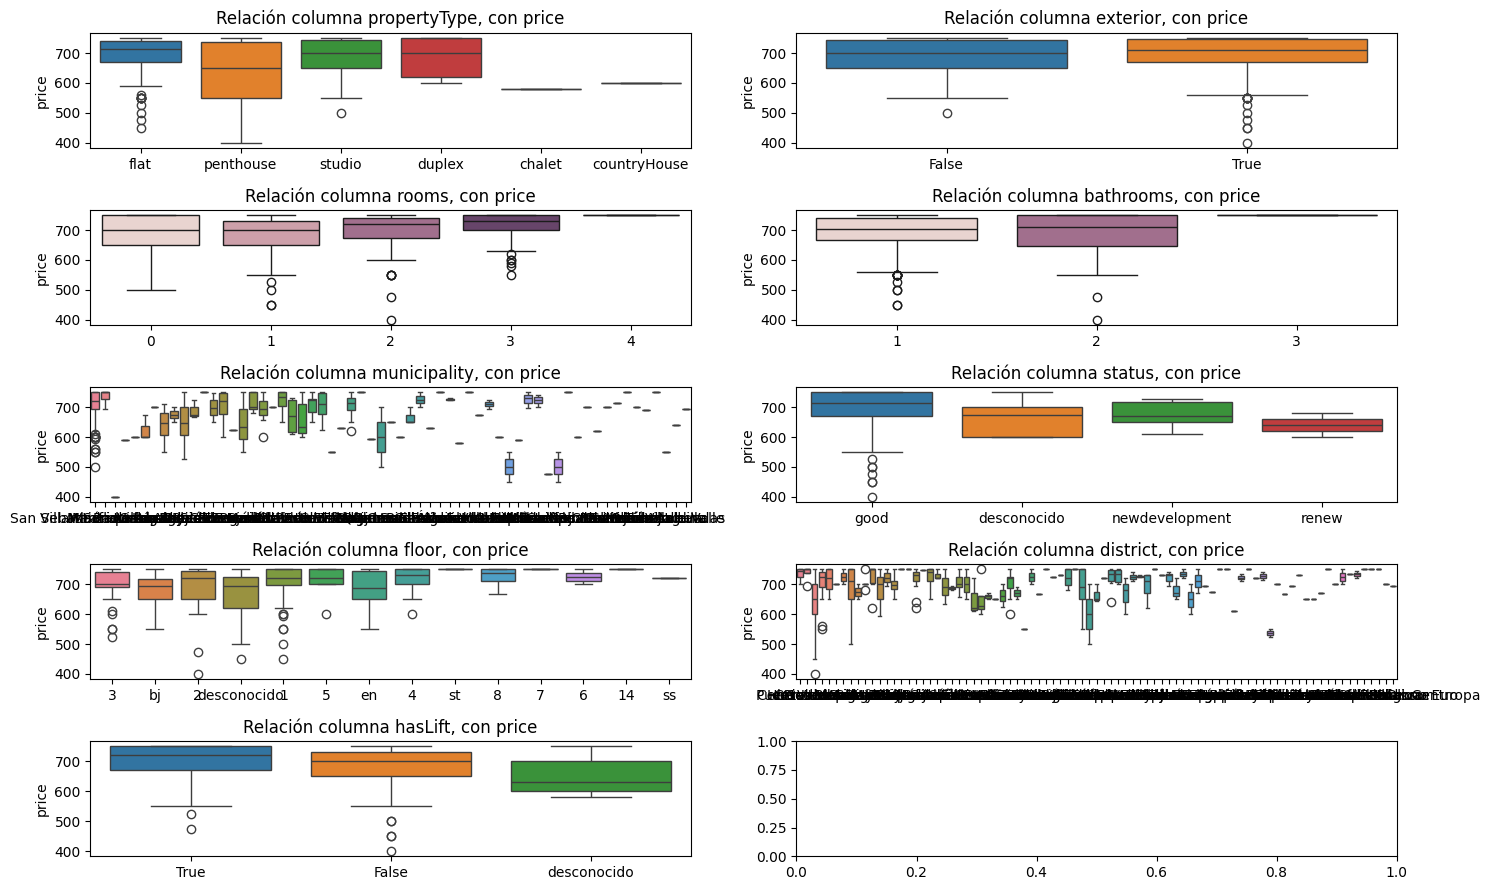

In [14]:
f.visualizar_categoricas(df_sinull_copy, "price", (15,9), "box")

Ahora debemos comprobar la normalidad y homocedasticidad para saber si son parametricas o no parametricas (Con el fin de más adelante poder evaluar si hay diferencias significativas)

Estamos probando primero con kruskal para en aquellas que solo tienen dos categoría comparar con Whitney

Tuve que convertir estas variables a str porque sino no las detectaba como categóricas

In [15]:
df_sinull_copy["exterior"]=df_sinull_copy["exterior"].astype(str)
df_sinull_copy["rooms"]=df_sinull_copy["rooms"].astype(str)
df_sinull_copy["bathrooms"]=df_sinull_copy["bathrooms"].astype(str)

In [16]:
# llamamos a la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = f.Asunciones(dataframe = df_sinull_copy, columna_numerica= "price")
print("\n-------------\n")
lista_col_categ=df_sinull_copy.select_dtypes(include="O")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # llamamos la clase de test estadísticos para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = f.TestEstadisticos(df_sinull_copy, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 7.557481050503615
Valor p: 0.18236920561912942
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,20.00,1.00,-222.80,262.80,chalet-countryHouse
1,109.29,0.49,-68.43,287.00,chalet-duplex
2,117.72,0.37,-54.28,289.71,chalet-flat
3,39.90,0.99,-140.17,219.97,chalet-penthouse
4,109.62,0.46,-63.84,283.09,chalet-studio
5,89.29,0.70,-88.43,267.00,countryHouse-duplex
6,97.72,0.58,-74.28,269.71,countryHouse-flat
7,19.90,1.00,-160.17,199.97,countryHouse-penthouse
8,89.62,0.68,-83.84,263.09,countryHouse-studio
9,8.43,1.00,-38.61,55.47,duplex-flat



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de Kruskal...
Estadístico de prueba: 0.7800817255751408
Valor p: 0.3771161463689554
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,7.81,0.36,-8.91,24.53,False-True



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de Kruskal...
Estadístico de prueba: 10.351510597501896
Valor p: 0.03490503788695897
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8.20,0.93,-36.53,20.12,0-1
1,7.11,0.96,-20.99,35.21,0-2
2,18.57,0.56,-15.22,52.37,0-3
3,59.14,0.87,-109.83,228.12,0-4
4,15.32,0.28,-5.89,36.53,1-2
5,26.78,0.07,-1.55,55.10,1-3
6,67.35,0.81,-100.62,235.31,1-4
7,11.46,0.80,-16.64,39.56,2-3
8,52.03,0.91,-115.90,219.96,2-4
9,40.57,0.96,-128.40,209.55,3-4



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de Kruskal...
Estadístico de prueba: 1.7715924239865188
Valor p: 0.4123856960905885
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-13.67,0.43,-39.76,12.42,1-2
1,55.42,0.64,-89.30,200.14,1-3
2,69.09,0.51,-77.51,215.69,2-3



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Aldea del Fresno', 'Fuenlabrada', 'Mata

,meandiff,p-adj,lower,upper,group_diff
0,-10.09,1.00,-218.68,198.50,Alcalá de Henares-Alcobendas
1,14.91,1.00,-79.05,108.87,Alcalá de Henares-Alcorcón
2,-30.09,1.00,-238.68,178.50,Alcalá de Henares-Aldea del Fresno
3,44.91,1.00,-163.68,253.50,Alcalá de Henares-Algete
4,-61.97,0.69,-146.19,22.26,Alcalá de Henares-Aranjuez
...,...,...,...,...,...
1825,48.67,1.00,-186.90,284.23,Villalbilla-Villanueva del Pardillo
1826,-40.00,1.00,-328.51,248.51,Villalbilla-Villaviciosa de Odón
1827,288.67,0.00,53.10,524.23,Villamanrique de Tajo-Villanueva del Pardillo
1828,200.00,0.82,-88.51,488.51,Villamanrique de Tajo-Villaviciosa de Odón



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 11.227025040843019
Valor p: 0.010559522030704356
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,33.07,0.22,-11.58,77.72,desconocido-good
1,13.69,0.94,-48.21,75.59,desconocido-newdevelopment
2,-22.62,0.96,-142.48,97.25,desconocido-renew
3,-19.38,0.68,-64.03,25.27,good-newdevelopment
4,-55.68,0.57,-167.62,56.25,good-renew
5,-36.31,0.86,-156.18,83.56,newdevelopment-renew



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', '2', 'desconocido', '1', '5', 'en', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de Kruskal...
Estadístico de prueba: 29.494883152699106
Valor p: 0.005565372366604717
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,48.24,1.00,-157.76,254.24,1-14
1,-5.58,1.00,-42.25,31.09,1-2
2,-3.65,1.00,-42.47,35.17,1-3
3,13.85,1.00,-29.34,57.04,1-4
4,12.69,1.00,-59.74,85.12,1-5
...,...,...,...,...,...
86,48.22,1.00,-158.03,254.46,desconocido-ss
87,78.22,0.99,-128.03,284.46,desconocido-st
88,40.83,1.00,-180.10,261.77,en-ss
89,70.83,1.00,-150.10,291.77,en-st



###########################

Estamos analizando la variable DISTRICT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable district las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Hortaleza', 'Centro Urbano', 'desconocido', 'Puente de Vallecas', 'Ciudad Lineal', 'Casco Antiguo', 'Moncloa', 'Centro', 'Centro - Casco Histórico', 'Retiro', 'Arganzuela', 'Latina', 'Barrio de Salamanca', 'Barajas', 'Las Matas- Peñascales', 'Chamberí', 'Villaverde', 'La Dehesa - El Pinar', 'Reyes Católicos', 'Chorrillo', 'Valdepelayo - Montepinos - Arroyo Culebro', 'Valleaguado - La Cañada', 'Suroeste', 'San Isidro - Los Almendros', 'San José - Buenos Aires', 'Hospital', 'Parque de la Coruña - Las Suertes', 'Valderas - Los Castillos', 'Getafe Centro', 'San Blas', 'Val', 'Casco Urbano', 'Casco Histórico', 'Los Llanos - Valle Pardo', 'Ensanche', 'Dehesa - El Soto', 'Pintores-Ferial', 'Carabanchel', 'Zona Estaci

,meandiff,p-adj,lower,upper,group_diff
0,23.57,1.00,-244.46,291.60,Alcobendas Centro-Arganzuela
1,3.75,1.00,-276.56,284.06,Alcobendas Centro-Barajas
2,27.50,1.00,-279.56,334.56,Alcobendas Centro-Barrio de Salamanca
3,40.00,1.00,-314.57,394.57,Alcobendas Centro-Buenavista
4,28.09,1.00,-233.77,289.96,Alcobendas Centro-Carabanchel
...,...,...,...,...,...
3398,-50.00,1.00,-404.57,304.57,Zona Estación- Centro-Zona Pueblo
3399,-105.84,1.00,-359.10,147.43,Zona Estación- Centro-desconocido
3400,-50.00,1.00,-404.57,304.57,Zona Industrial-Zona Pueblo
3401,-105.84,1.00,-359.10,147.43,Zona Industrial-desconocido



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 10.710955411592971
Valor p: 0.004722213130024167
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,15.13,0.06,-0.50,30.76,False-True
1,-34.44,0.09,-72.91,4.04,False-desconocido
2,-49.56,0.01,-87.92,-11.21,True-desconocido



###########################



Ahora con Mann-Whitney

In [17]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = f.Asunciones(dataframe = df_sinull_copy, columna_numerica= "price")
print("\n-------------\n")
lista_col_categ=df_sinull_copy.select_dtypes(include="O")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = f.TestEstadisticos(df_sinull_copy, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 7.557481050503615
Valor p: 0.18236920561912942
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,20.00,1.00,-222.80,262.80,chalet-countryHouse
1,109.29,0.49,-68.43,287.00,chalet-duplex
2,117.72,0.37,-54.28,289.71,chalet-flat
3,39.90,0.99,-140.17,219.97,chalet-penthouse
4,109.62,0.46,-63.84,283.09,chalet-studio
5,89.29,0.70,-88.43,267.00,countryHouse-duplex
6,97.72,0.58,-74.28,269.71,countryHouse-flat
7,19.90,1.00,-160.17,199.97,countryHouse-penthouse
8,89.62,0.68,-83.84,263.09,countryHouse-studio
9,8.43,1.00,-38.61,55.47,duplex-flat



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 9724.5
Valor p: 0.377491052163637
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,7.81,0.36,-8.91,24.53,False-True



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de Kruskal...
Estadístico de prueba: 10.351510597501896
Valor p: 0.03490503788695897
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8.20,0.93,-36.53,20.12,0-1
1,7.11,0.96,-20.99,35.21,0-2
2,18.57,0.56,-15.22,52.37,0-3
3,59.14,0.87,-109.83,228.12,0-4
4,15.32,0.28,-5.89,36.53,1-2
5,26.78,0.07,-1.55,55.10,1-3
6,67.35,0.81,-100.62,235.31,1-4
7,11.46,0.80,-16.64,39.56,2-3
8,52.03,0.91,-115.90,219.96,2-4
9,40.57,0.96,-128.40,209.55,3-4



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de Kruskal...
Estadístico de prueba: 1.7715924239865188
Valor p: 0.4123856960905885
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-13.67,0.43,-39.76,12.42,1-2
1,55.42,0.64,-89.30,200.14,1-3
2,69.09,0.51,-77.51,215.69,2-3



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Aldea del Fresno', 'Fuenlabrada', 'Mata

,meandiff,p-adj,lower,upper,group_diff
0,-10.09,1.00,-218.68,198.50,Alcalá de Henares-Alcobendas
1,14.91,1.00,-79.05,108.87,Alcalá de Henares-Alcorcón
2,-30.09,1.00,-238.68,178.50,Alcalá de Henares-Aldea del Fresno
3,44.91,1.00,-163.68,253.50,Alcalá de Henares-Algete
4,-61.97,0.69,-146.19,22.26,Alcalá de Henares-Aranjuez
...,...,...,...,...,...
1825,48.67,1.00,-186.90,284.23,Villalbilla-Villanueva del Pardillo
1826,-40.00,1.00,-328.51,248.51,Villalbilla-Villaviciosa de Odón
1827,288.67,0.00,53.10,524.23,Villamanrique de Tajo-Villanueva del Pardillo
1828,200.00,0.82,-88.51,488.51,Villamanrique de Tajo-Villaviciosa de Odón



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 11.227025040843019
Valor p: 0.010559522030704356
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,33.07,0.22,-11.58,77.72,desconocido-good
1,13.69,0.94,-48.21,75.59,desconocido-newdevelopment
2,-22.62,0.96,-142.48,97.25,desconocido-renew
3,-19.38,0.68,-64.03,25.27,good-newdevelopment
4,-55.68,0.57,-167.62,56.25,good-renew
5,-36.31,0.86,-156.18,83.56,newdevelopment-renew



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', '2', 'desconocido', '1', '5', 'en', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de Kruskal...
Estadístico de prueba: 29.494883152699106
Valor p: 0.005565372366604717
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,48.24,1.00,-157.76,254.24,1-14
1,-5.58,1.00,-42.25,31.09,1-2
2,-3.65,1.00,-42.47,35.17,1-3
3,13.85,1.00,-29.34,57.04,1-4
4,12.69,1.00,-59.74,85.12,1-5
...,...,...,...,...,...
86,48.22,1.00,-158.03,254.46,desconocido-ss
87,78.22,0.99,-128.03,284.46,desconocido-st
88,40.83,1.00,-180.10,261.77,en-ss
89,70.83,1.00,-150.10,291.77,en-st



###########################

Estamos analizando la variable DISTRICT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable district las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Hortaleza', 'Centro Urbano', 'desconocido', 'Puente de Vallecas', 'Ciudad Lineal', 'Casco Antiguo', 'Moncloa', 'Centro', 'Centro - Casco Histórico', 'Retiro', 'Arganzuela', 'Latina', 'Barrio de Salamanca', 'Barajas', 'Las Matas- Peñascales', 'Chamberí', 'Villaverde', 'La Dehesa - El Pinar', 'Reyes Católicos', 'Chorrillo', 'Valdepelayo - Montepinos - Arroyo Culebro', 'Valleaguado - La Cañada', 'Suroeste', 'San Isidro - Los Almendros', 'San José - Buenos Aires', 'Hospital', 'Parque de la Coruña - Las Suertes', 'Valderas - Los Castillos', 'Getafe Centro', 'San Blas', 'Val', 'Casco Urbano', 'Casco Histórico', 'Los Llanos - Valle Pardo', 'Ensanche', 'Dehesa - El Soto', 'Pintores-Ferial', 'Carabanchel', 'Zona Estaci

,meandiff,p-adj,lower,upper,group_diff
0,23.57,1.00,-244.46,291.60,Alcobendas Centro-Arganzuela
1,3.75,1.00,-276.56,284.06,Alcobendas Centro-Barajas
2,27.50,1.00,-279.56,334.56,Alcobendas Centro-Barrio de Salamanca
3,40.00,1.00,-314.57,394.57,Alcobendas Centro-Buenavista
4,28.09,1.00,-233.77,289.96,Alcobendas Centro-Carabanchel
...,...,...,...,...,...
3398,-50.00,1.00,-404.57,304.57,Zona Estación- Centro-Zona Pueblo
3399,-105.84,1.00,-359.10,147.43,Zona Estación- Centro-desconocido
3400,-50.00,1.00,-404.57,304.57,Zona Industrial-Zona Pueblo
3401,-105.84,1.00,-359.10,147.43,Zona Industrial-desconocido



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 10.710955411592971
Valor p: 0.004722213130024167
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,15.13,0.06,-0.50,30.76,False-True
1,-34.44,0.09,-72.91,4.04,False-desconocido
2,-49.56,0.01,-87.92,-11.21,True-desconocido



###########################



Las columnas a comparar entre whitney y kruskal son:  
EXTERIOR  
- MAN: NO HAY DIFERENCIAS 
- KRUSKAL: NO HAY DIFERENCIAS  

Aunque las conclusiones no cambien, es más correcto usar la opción de Mann-Whitney y Kruskal combinadas (2º opción).  



#### FIJANDONOS TANTO EN LAS VISUALIZACIONES COMO EN EL TEST DE TUKEY HEMOS OBTENIDO LAS SIGUIENTES CONCLUSIONES:  

**NO ORDENADAS:**
- PROPERTYTYPE
- EXTERIOR  
- BATHROOMS  
- DISTRICT

  
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- ROOMS (entre 1 y 3)  
- MUNICIPALITY (hay)  
- STATUS (hay)  
- FLOOR (hay)
- HASLIFT (true y desconocido)


  

*lo de entre parentesis hace referencia a la cantidad de categorías que son diferentes en esa columna*  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



**Ahora pasamos al encodin de las que no tienen orden:**

In [18]:
df_sinull_copy.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'status', 'floor', 'district', 'hasLift'],
      dtype='object')

In [19]:
diccionario_encoding = {"onehot": ["propertyType", "exterior", "bathrooms", "district"], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ["rooms",  "municipality", "floor", "hasLift", "status"]  
                        }

In [20]:
# df_copy_cat=df_sinout_copy.select_dtypes("O")

In [21]:
# dfcop=df_sinout_copy.copy()

In [22]:
encoding=f.Encoding(dataframe = df_sinull_copy , diccionario_encoding= diccionario_encoding, variable_respuesta= "price")
df_sinull_copy= encoding.one_hot_encoding()
df_sinull_copy.head()
#nos genera 40 columnas nuevas aproximadamente

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,bathrooms_1,bathrooms_2,bathrooms_3,district_Alcobendas Centro,district_Arganzuela,district_Barajas,district_Barrio de Salamanca,district_Buenavista,district_Carabanchel,district_Carlos Ruiz,district_Casco Antiguo,district_Casco Histórico,district_Casco Urbano,district_Centro,district_Centro - Casco Histórico,district_Centro Urbano,district_Chamartín,district_Chamberí,district_Chorrillo,district_Ciudad 70,district_Ciudad Lineal,district_Dehesa - El Soto,district_El Mirador,district_El Mirador - Grillero,district_El Nido-Las Fuentes,district_Ensanche,district_Espartales,district_Foso-Moreras,district_Fuencarral,district_Fuentebella-San Felix-El Leguario,district_Getafe Centro,district_Getafe norte,district_Hortaleza,district_Hospital,district_Juan de Austria,district_La Alhóndiga,district_La Dehesa - El Pinar,district_La Espinilla - Parque Blanco,district_Las Américas,district_Las Matas- Peñascales,district_Las Sedas - El Olivar,district_Latina,district_Los Llanos - Valle Pardo,district_Moncloa,district_Montserrat - Parque Empresarial,district_Noroeste,district_Nuevo Aranjuez-Ciudad de las Artes,district_Parla Este,district_Parque Europa - Los Pitufos,district_Parque Inlasa,district_Parque Roma - Coronas,district_Parque de la Coruña - Las Suertes,district_Pintores-Ferial,district_Pol. Industrial sur,district_Pryconsa - Poligono Europa,district_Puente de Vallecas,district_Retiro,district_Reyes,district_Reyes Católicos,district_Rivas Futura,district_San Blas,district_San Crispín - La Estación Consorcio,district_San Isidro,district_San Isidro - Los Almendros,district_San José - Buenos Aires,district_Sudeste Industrial,district_Suroeste,district_Tetuán,district_Universidad,district_Usera,district_Val,district_Valdemorillo pueblo,district_Valdepelayo - Montepinos - Arroyo Culebro,district_Valderas - Los Castillos,district_Valleaguado - La Cañada,district_Vega de la Moraleja,district_Vicálvaro,district_Villa de Vallecas,district_Villalba Estación,district_Villaverde,district_Villayuventus-Renfe,district_Zona Estación,district_Zona Estación- Centro,district_Zona Industrial,district_Zona Pueblo,district_desconocido
0,750.00,flat,60.00,True,1,1,Madrid,7037,good,3,Hortaleza,True,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,750.00,flat,70.00,True,2,1,San Sebastián de los Reyes,16145,good,bj,Centro Urbano,False,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,400.00,penthouse,67.00,True,2,2,Villamanrique de Tajo,55041,good,2,desconocido,False,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [23]:
df_sinull_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Columns: 106 entries, price to district_desconocido
dtypes: float64(96), int64(1), object(9)
memory usage: 288.3+ KB


Aqui ya está codificada la de abtest en abtest_test vamos a por el resto

In [24]:
encoder_target= TargetEncoder(cols=["rooms",  "municipality", "floor", "hasLift", "status"])
encoded= encoder_target.fit_transform(df_sinull_copy , df_sinull_copy[["price"]])
lista_eliminar=["propertyType", "exterior", "bathrooms", "district"]
encoded.drop(columns=lista_eliminar, inplace=True)


In [25]:
encoded.head(2)

,price,size,rooms,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,bathrooms_1,bathrooms_2,bathrooms_3,district_Alcobendas Centro,district_Arganzuela,district_Barajas,district_Barrio de Salamanca,district_Buenavista,district_Carabanchel,district_Carlos Ruiz,district_Casco Antiguo,district_Casco Histórico,district_Casco Urbano,district_Centro,district_Centro - Casco Histórico,district_Centro Urbano,district_Chamartín,district_Chamberí,district_Chorrillo,district_Ciudad 70,district_Ciudad Lineal,district_Dehesa - El Soto,district_El Mirador,district_El Mirador - Grillero,district_El Nido-Las Fuentes,district_Ensanche,district_Espartales,district_Foso-Moreras,district_Fuencarral,district_Fuentebella-San Felix-El Leguario,district_Getafe Centro,district_Getafe norte,district_Hortaleza,district_Hospital,district_Juan de Austria,district_La Alhóndiga,district_La Dehesa - El Pinar,district_La Espinilla - Parque Blanco,district_Las Américas,district_Las Matas- Peñascales,district_Las Sedas - El Olivar,district_Latina,district_Los Llanos - Valle Pardo,district_Moncloa,district_Montserrat - Parque Empresarial,district_Noroeste,district_Nuevo Aranjuez-Ciudad de las Artes,district_Parla Este,district_Parque Europa - Los Pitufos,district_Parque Inlasa,district_Parque Roma - Coronas,district_Parque de la Coruña - Las Suertes,district_Pintores-Ferial,district_Pol. Industrial sur,district_Pryconsa - Poligono Europa,district_Puente de Vallecas,district_Retiro,district_Reyes,district_Reyes Católicos,district_Rivas Futura,district_San Blas,district_San Crispín - La Estación Consorcio,district_San Isidro,district_San Isidro - Los Almendros,district_San José - Buenos Aires,district_Sudeste Industrial,district_Suroeste,district_Tetuán,district_Universidad,district_Usera,district_Val,district_Valdemorillo pueblo,district_Valdepelayo - Montepinos - Arroyo Culebro,district_Valderas - Los Castillos,district_Valleaguado - La Cañada,district_Vega de la Moraleja,district_Vicálvaro,district_Villa de Vallecas,district_Villalba Estación,district_Villaverde,district_Villayuventus-Renfe,district_Zona Estación,district_Zona Estación- Centro,district_Zona Industrial,district_Zona Pueblo,district_desconocido
0,750.00,60.00,682.65,705.59,7037,695.68,697.78,702.50,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,750.00,70.00,697.97,701.80,16145,695.68,678.67,687.37,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
encoded.columns

Index(['price', 'size', 'rooms', 'municipality', 'distance', 'status', 'floor',
       'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
       ...
       'district_Vicálvaro', 'district_Villa de Vallecas',
       'district_Villalba Estación', 'district_Villaverde',
       'district_Villayuventus-Renfe', 'district_Zona Estación',
       'district_Zona Estación- Centro', 'district_Zona Industrial',
       'district_Zona Pueblo', 'district_desconocido'],
      dtype='object', length=102)

In [28]:
df_final_encoded=encoded

TENGO QUE REVISAR PORQUE ME HA GENERADO NAN EN MONTCREATED

In [29]:
df_final_encoded.head()

,price,size,rooms,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,bathrooms_1,bathrooms_2,bathrooms_3,district_Alcobendas Centro,district_Arganzuela,district_Barajas,district_Barrio de Salamanca,district_Buenavista,district_Carabanchel,district_Carlos Ruiz,district_Casco Antiguo,district_Casco Histórico,district_Casco Urbano,district_Centro,district_Centro - Casco Histórico,district_Centro Urbano,district_Chamartín,district_Chamberí,district_Chorrillo,district_Ciudad 70,district_Ciudad Lineal,district_Dehesa - El Soto,district_El Mirador,district_El Mirador - Grillero,district_El Nido-Las Fuentes,district_Ensanche,district_Espartales,district_Foso-Moreras,district_Fuencarral,district_Fuentebella-San Felix-El Leguario,district_Getafe Centro,district_Getafe norte,district_Hortaleza,district_Hospital,district_Juan de Austria,district_La Alhóndiga,district_La Dehesa - El Pinar,district_La Espinilla - Parque Blanco,district_Las Américas,district_Las Matas- Peñascales,district_Las Sedas - El Olivar,district_Latina,district_Los Llanos - Valle Pardo,district_Moncloa,district_Montserrat - Parque Empresarial,district_Noroeste,district_Nuevo Aranjuez-Ciudad de las Artes,district_Parla Este,district_Parque Europa - Los Pitufos,district_Parque Inlasa,district_Parque Roma - Coronas,district_Parque de la Coruña - Las Suertes,district_Pintores-Ferial,district_Pol. Industrial sur,district_Pryconsa - Poligono Europa,district_Puente de Vallecas,district_Retiro,district_Reyes,district_Reyes Católicos,district_Rivas Futura,district_San Blas,district_San Crispín - La Estación Consorcio,district_San Isidro,district_San Isidro - Los Almendros,district_San José - Buenos Aires,district_Sudeste Industrial,district_Suroeste,district_Tetuán,district_Universidad,district_Usera,district_Val,district_Valdemorillo pueblo,district_Valdepelayo - Montepinos - Arroyo Culebro,district_Valderas - Los Castillos,district_Valleaguado - La Cañada,district_Vega de la Moraleja,district_Vicálvaro,district_Villa de Vallecas,district_Villalba Estación,district_Villaverde,district_Villayuventus-Renfe,district_Zona Estación,district_Zona Estación- Centro,district_Zona Industrial,district_Zona Pueblo,district_desconocido
0,750.00,60.00,682.65,705.59,7037,695.68,697.78,702.50,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,750.00,70.00,697.97,701.80,16145,695.68,678.67,687.37,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,400.00,67.00,697.97,655.23,55041,695.68,696.10,687.37,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,590.00,70.00,708.59,679.95,56596,695.68,672.17,687.37,0.00,0

In [30]:
df_final_encoded.to_csv("../../datos/datos4/datos_nulos_encoded.csv")